## MULTIWAY CUT LP relaxation
### Graph based on viewers rating movies
Here we solve the relaxed LP to find the multiway cut in a graph. The goal of the minimum multiway Cut is to find a set of edges $E_2 \subseteq E$ with minimum weight such that removing $E_2$ from $G$ separates all terminals nodes preselected.

In [1]:
%matplotlib inline
import networkx as nx
import numpy as np
import pylab

from algo import build_laplacian, solve_multicut, assignment_solution_lp
from data_proc import build_a, build_graph, build_user_to_movies

In [2]:
np.set_printoptions(precision=2)

## Fake data to illustrate the integral solution
Easy multiway cut solution with 3 terminal nodes.

In [3]:
W = np.array([[0,10,0,0,0,0,1,15],
              [10,0,1,0,0,0,0,0],
              [0,1,0,10,0,0,0,0],
              [0,0,10,0,1,0,0,0],
              [0,0,0,1,0,10,0,0],
              [0,0,0,0,10,0,10,0],
              [1,0,0,0,0,10,0,1],
              [15,0,0,0,0,0,1,0],
             ])
T = [0, 2, 5]

In [4]:
D = solve_multicut(W, T)
#print(np.reshape(D, W.shape))

{'status': 'optimal', 'time': 0.055029869079589844, 'obj': 4.000000011033309, 'cvxopt_sol': {'status': 'optimal', 'gap': 6.940936112231554e-08, 'iterations': 7, 'relative gap': 1.735234024185887e-08, 'primal slack': 3.709152651770829e-11, 'x': <256x1 matrix, tc='d'>, 'primal infeasibility': 4.4080273684581523e-10, 'dual slack': 2.7267066369357184e-11, 'residual as primal infeasibility certificate': None, 'y': <44x1 matrix, tc='d'>, 'primal objective': 4.000000013141017, 'residual as dual infeasibility certificate': None, 'z': <1010x1 matrix, tc='d'>, 'dual objective': 4.000000008925601, 'dual infeasibility': 2.5753752293364545e-10, 's': <1010x1 matrix, tc='d'>}}


In [5]:
assignment_D = assignment_solution_lp(D, T, threshold=0.1)

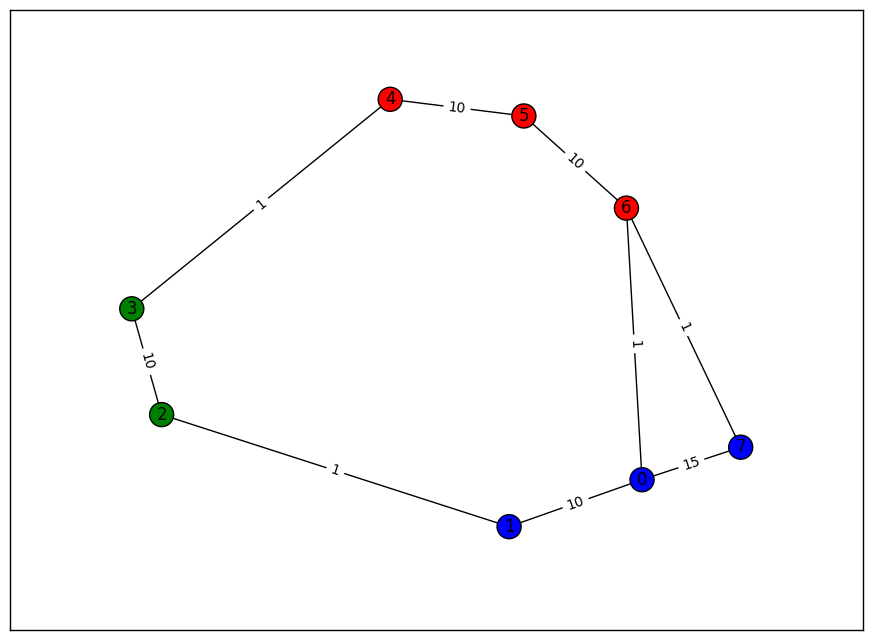

In [6]:
#display the graph
G = nx.from_numpy_matrix(W)
fig=pylab.figure(figsize=(11,8))

colors = ['b', 'g', 'r']
cluster_colors = dict()
for cluster_number, cluster in enumerate(assignment_D):
    cluster_colors[cluster] = colors[cluster_number]


node_colors=['w']*W.shape[0]
for cluster in assignment_D:
    nodes = assignment_D[cluster]
    for node in nodes:
        node_colors[node] = cluster_colors[cluster]

pos=nx.spring_layout(G)
#edges
nx.draw_networkx(G,pos,
                edgelist=[e for e in G.edges()],
                node_color=node_colors)


labels={e:'{0}'.format(W[e]) for e in G.edges()}
#flow label
nx.draw_networkx_edge_labels(G, pos,
                        edge_labels=labels)

#hide axis
fig.gca().axes.get_xaxis().set_ticks([])
fig.gca().axes.get_yaxis().set_ticks([])

pylab.show()

#### We introduce a gamma perturbation for only part of the edges

In [8]:
gamma = 5
# random boolean mask for which values will be changed
mask = np.random.randint(0,2,size=W.shape).astype(np.bool)

# random matrix the same shape of the data
r = gamma * W

# use your mask to replace values in your input array
W_gamma2 = W.copy()
W_gamma2[mask] = r[mask]
D = solve_multicut(W_gamma2,T)
# print(D)
assignement_D = assignment_solution_lp(D, T, threshold=0.00001)
print(assignement_D)

{'status': 'optimal', 'time': 0.023485898971557617, 'obj': 8.000000003934499, 'cvxopt_sol': {'status': 'optimal', 'gap': 2.457778423736758e-08, 'iterations': 8, 'relative gap': 3.0722230284610785e-09, 'primal slack': 1.2919873493780334e-11, 'x': <256x1 matrix, tc='d'>, 'primal infeasibility': 1.035614564155456e-10, 'dual slack': 4.828331344178105e-12, 'residual as primal infeasibility certificate': None, 'y': <44x1 matrix, tc='d'>, 'primal objective': 8.000000004718528, 'residual as dual infeasibility certificate': None, 'z': <1010x1 matrix, tc='d'>, 'dual objective': 8.000000003150472, 'dual infeasibility': 4.0711199413249387e-11, 's': <1010x1 matrix, tc='d'>}}
{0: [0, 1, 7], 2: [2, 3], 5: [4, 5, 6]}


## Simulated data
Simulating a bipartite graph with viewers giving grades (between -2.5 and 2.5) to movies.

In [9]:
G=nx.Graph()

G.add_edge(1,5,weight=1)
G.add_edge(1,6,weight=1)
G.add_edge(2,5,weight=1)
G.add_edge(2,6,weight=1)
G.add_edge(2,7,weight=-1)
G.add_edge(2,8,weight=-1)
G.add_edge(3,7,weight=1)
G.add_edge(3,8,weight=1)
G.add_edge(3,10,weight=2.5)
G.add_edge(3,9,weight=0.5)
G.add_edge(4,7,weight=-2)
G.add_edge(4,9,weight=2.5)
G.add_edge(4,10,weight=0.5)
W = nx.to_numpy_matrix(G)
T = [1,2,3]
D = solve_multicut(W,T)
print(np.reshape(D, W.shape))
assignement_D = assignment_solution_lp(D, T, threshold=0.00001)
print(assignement_D)

{'status': 'optimal', 'time': 0.047781944274902344, 'obj': -2.9999999217363866, 'cvxopt_sol': {'status': 'optimal', 'gap': 2.6375845865322725e-07, 'iterations': 8, 'relative gap': 8.791948880145373e-08, 'primal slack': 2.229207723827739e-10, 'x': <400x1 matrix, tc='d'>, 'primal infeasibility': 1.42180474764718e-09, 'dual slack': 4.510673662695068e-11, 'residual as primal infeasibility certificate': None, 'y': <65x1 matrix, tc='d'>, 'primal objective': -2.9999999118382736, 'residual as dual infeasibility certificate': None, 'z': <1784x1 matrix, tc='d'>, 'dual objective': -2.9999999316344996, 'dual infeasibility': 5.1123556441777046e-09, 's': <1784x1 matrix, tc='d'>}}
[[  3.80e-25   1.42e-08   1.00e+00   1.00e+00   9.02e-09   9.02e-09
    1.00e+00   1.00e+00   1.00e+00   1.00e+00]
 [  1.42e-08  -7.86e-25   1.00e+00   1.00e+00   9.25e-09   9.25e-09
    1.00e+00   1.00e+00   1.00e+00   1.00e+00]
 [  1.00e+00   1.00e+00   9.38e-25   1.00e+00   1.00e+00   1.00e+00
    6.00e-09   1.42e-08   1

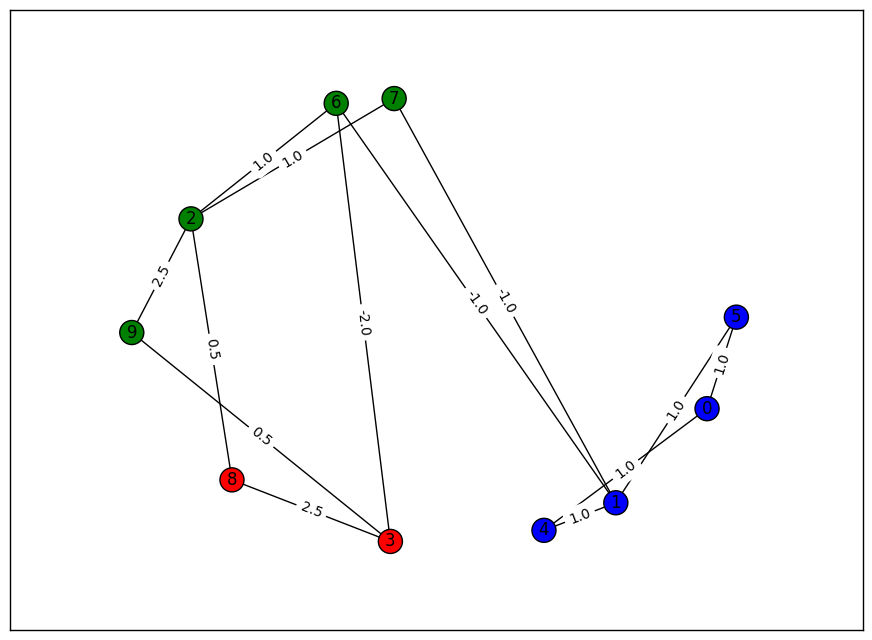

In [10]:
#display the graph
G = nx.from_numpy_matrix(W)
fig=pylab.figure(figsize=(11,8))

colors = ['b', 'g', 'r']
cluster_colors = dict()
for cluster_number, cluster in enumerate(assignement_D):
    cluster_colors[cluster] = colors[cluster_number]


node_colors=['w']*W.shape[0]
for cluster in assignement_D:
    nodes = assignement_D[cluster]
    for node in nodes:
        node_colors[node] = cluster_colors[cluster]

pos=nx.spring_layout(G)
#edges
nx.draw_networkx(G,pos,
                edgelist=[e for e in G.edges()],
                node_color=node_colors)


labels={e:'{0}'.format(W[e]) for e in G.edges()}
#flow label
nx.draw_networkx_edge_labels(G, pos,
                        edge_labels=labels)

#hide axis
fig.gca().axes.get_xaxis().set_ticks([])
fig.gca().axes.get_yaxis().set_ticks([])

pylab.show()

## Real data from themoviedb.org
Extracting  a sub graph of the entire database

In [11]:
# building the summary dictionary
summary_dictionary = build_user_to_movies('movielens.tsv')
# unpacking of the dictionary
users_to_movies = summary_dictionary['users_to_movies']
n_users = summary_dictionary['n_users']
k_users = 6
n_movies = summary_dictionary['n_movies']
k_movies = 8

test_clustering = False
k=0
while test_clustering == False and k<50:
    # building the rating matrix
    a = build_a(n_users, k_users, n_movies, k_movies, users_to_movies)
    # building the adjacency matrix
    W = build_graph(k_users, k_movies, a)
    T = [0,2,3,4]
    D = solve_multicut(W,T)
    D_array=np.array(D)
    assignment_D = assignment_solution_lp(D_array, T, threshold=0.00001)
    if assignment_D != False:
        test_clustering == True
    k+=1

{'status': 'optimal', 'time': 0.21213603019714355, 'obj': 0.5000000003787135, 'cvxopt_sol': {'status': 'optimal', 'gap': 9.278238290162587e-10, 'iterations': 10, 'relative gap': 1.8556476568002261e-09, 'primal slack': 3.081215417701046e-13, 'x': <980x1 matrix, tc='d'>, 'primal infeasibility': 3.1320627118147675e-12, 'dual slack': 8.583481215259534e-14, 'residual as primal infeasibility certificate': None, 'y': <121x1 matrix, tc='d'>, 'primal objective': 0.5000000004253891, 'residual as dual infeasibility certificate': None, 'z': <4678x1 matrix, tc='d'>, 'dual objective': 0.5000000003320381, 'dual infeasibility': 1.3716568391197238e-11, 's': <4678x1 matrix, tc='d'>}}
{'status': 'unknown', 'time': 0.22536492347717285, 'obj': 4.500000435375025, 'cvxopt_sol': {'status': 'unknown', 'gap': 1.1666953523058158e-06, 'iterations': 9, 'relative gap': 2.592656115175581e-07, 'primal slack': 3.5974817900426974e-10, 'x': <980x1 matrix, tc='d'>, 'primal infeasibility': 3.7550393091578395e-09, 'dual sl

In [12]:
if test_clustering == False:
    W = np.load('good_real_matrix.npy')
    T = [0,2,4]
    D = solve_multicut(W,T)
    D_array=np.array(D)
    assignment_D = assignment_solution_lp(D_array, T, threshold=0.00001)

{'status': 'optimal', 'time': 0.21361494064331055, 'obj': 1.0000000352177616, 'cvxopt_sol': {'status': 'optimal', 'gap': 8.6485618545534e-08, 'iterations': 12, 'relative gap': 8.64856157581435e-08, 'primal slack': 2.4112695078162877e-11, 'x': <784x1 matrix, tc='d'>, 'primal infeasibility': 2.0826673287412892e-10, 'dual slack': 7.973979117068246e-12, 'residual as primal infeasibility certificate': None, 'y': <119x1 matrix, tc='d'>, 'primal objective': 1.0000000382059957, 'residual as dual infeasibility certificate': None, 'z': <4292x1 matrix, tc='d'>, 'dual objective': 1.0000000322295273, 'dual infeasibility': 1.02809736457063e-09, 's': <4292x1 matrix, tc='d'>}}


In [13]:
print(assignment_D)

{0: [0, 1, 8, 9, 11, 13], 2: [2, 3, 6, 10, 12], 4: [4, 5, 7]}


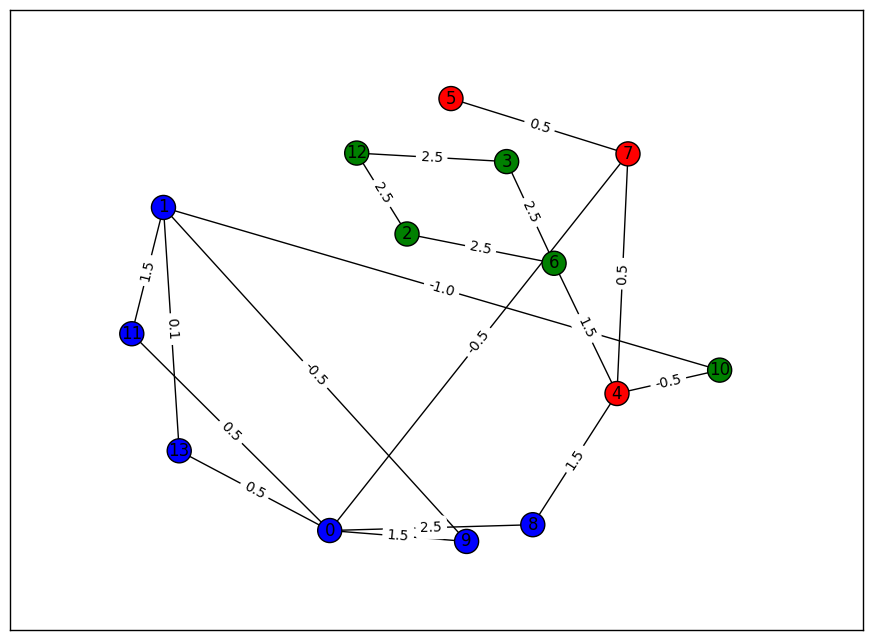

In [20]:
#display the graph
G = nx.from_numpy_matrix(W)
fig=pylab.figure(figsize=(11,8))

colors = ['b', 'g', 'r','y','p']
cluster_colors = dict()
for cluster_number, cluster in enumerate(assignment_D):
    cluster_colors[cluster] = colors[cluster_number]


node_colors=['w']*W.shape[0]
for cluster in assignment_D:
    nodes = assignment_D[cluster]
    for node in nodes:
        node_colors[node] = cluster_colors[cluster]

pos=nx.spring_layout(G)
#edges
nx.draw_networkx(G,pos,
                edgelist=[e for e in G.edges()],
                node_color=node_colors)


labels={e:'{0}'.format(W[e]) for e in G.edges()}
#flow label
nx.draw_networkx_edge_labels(G, pos,
                        edge_labels=labels)

#hide axis
fig.gca().axes.get_xaxis().set_ticks([])
fig.gca().axes.get_yaxis().set_ticks([])

pylab.show()

#### We introduce a gamma perturbation for only part of the edges

In [21]:
gamma = 5
# random boolean mask for which values will be changed
mask = np.random.randint(0,2,size=W.shape).astype(np.bool)

# random matrix the same shape of the data
r = gamma * W

# use your mask to replace values in your input array
W_gamma2 = W.copy()
W_gamma2[mask] = r[mask]
D = solve_multicut(W,T)
assignement_D = assignment_solution_lp(D, T, threshold=0.00001)
print(assignement_D)

{'status': 'optimal', 'time': 0.22440195083618164, 'obj': 1.0000000352177616, 'cvxopt_sol': {'status': 'optimal', 'gap': 8.6485618545534e-08, 'iterations': 12, 'relative gap': 8.64856157581435e-08, 'primal slack': 2.4112695078162877e-11, 'x': <784x1 matrix, tc='d'>, 'primal infeasibility': 2.0826673287412892e-10, 'dual slack': 7.973979117068246e-12, 'residual as primal infeasibility certificate': None, 'y': <119x1 matrix, tc='d'>, 'primal objective': 1.0000000382059957, 'residual as dual infeasibility certificate': None, 'z': <4292x1 matrix, tc='d'>, 'dual objective': 1.0000000322295273, 'dual infeasibility': 1.02809736457063e-09, 's': <4292x1 matrix, tc='d'>}}
{0: [0, 1, 8, 9, 11, 13], 2: [2, 3, 6, 10, 12], 4: [4, 5, 7]}


### Distorting real graphs
We created this section to distort real graphs if they are weakly gamma stable and we want this gamma to overpass the value '4' for theorem 3.
Distortion is still meaningful for viewers rating movies.

In [ ]:
W_sign = np.sign(W)
W_abs = np.absolute(W)
W_exp_abs = np.exp(W_abs)
W_distorted = np.multiply(W_sign, W_exp_abs)

D = solve_multicut(W_distorted,T)
print(np.round(np.reshape(D, W_distorted.shape)))
assignement_D = assignment_solution_lp(D, T, threshold=0.00001)
print(assignement_D)

In [ ]:
#display the graph
G = nx.from_numpy_matrix(W_distorted)
fig=pylab.figure(figsize=(11,8))

colors = ['b', 'g', 'r']
cluster_colors = dict()
for cluster_number, cluster in enumerate(assignement_D):
    cluster_colors[cluster] = colors[cluster_number]


node_colors=['w']*W.shape[0]
for cluster in assignement_D:
    nodes = assignement_D[cluster]
    for node in nodes:
        node_colors[node] = cluster_colors[cluster]

pos=nx.spring_layout(G)
#edges
nx.draw_networkx(G,pos,
                edgelist=[e for e in G.edges()],
                node_color=node_colors)


labels={e:'{0}'.format(np.round(W_distorted[e],3)) for e in G.edges()}
#flow label
nx.draw_networkx_edge_labels(G, pos,
                        edge_labels=labels)

#hide axis
fig.gca().axes.get_xaxis().set_ticks([])
fig.gca().axes.get_yaxis().set_ticks([])

pylab.show()